In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [5]:
route = "/content/drive/MyDrive/IMPACT PROJECT"

In [7]:
behaviors_cols = ['Impression_ID', 'User_ID', 'Time', 'History', 'Impressions']
news_cols = ['News_ID', 'Category', 'SubCategory', 'Title', 'Abstract', 'URL', 'Title_Entities', 'Abstract_Entities']

train_behaviors = pd.read_csv(f"{route}/train/behaviors.tsv", sep="\t", header=None, names=behaviors_cols)
train_news = pd.read_csv(f"{route}/train/news.tsv", sep="\t", header=None, names=news_cols)

test_behaviors = pd.read_csv(f"{route}/test/behaviors.tsv", sep="\t", header=None, names=behaviors_cols)
test_news = pd.read_csv(f"{route}/test/news.tsv", sep="\t", header=None, names=news_cols)

#val_behaviors = pd.read_csv("data/MINDlarge_dev/behaviors.tsv", sep="\t", header=None, names=behaviors_cols)
#val_news = pd.read_csv("data/MINDlarge_dev/news.tsv", sep="\t", header=None, names=news_cols)

## **COUNT OF NEWS CATEGORIES**

In [8]:
c=train_news[['Category','SubCategory']].value_counts()

In [9]:
index=[]
for i in c.index:
    index.append(np.array(i))
index=np.array(index)

In [10]:
df=pd.DataFrame(columns=['Category','Sub Category','Values'])
df['Category']=index[:,0]
df['Sub Category']=index[:,1]
df['Values']=c.values

In [11]:
px.bar(data_frame=df,x='Category',y='Values',color='Sub Category')

## **WORDCLOUD FOR SPORTS**

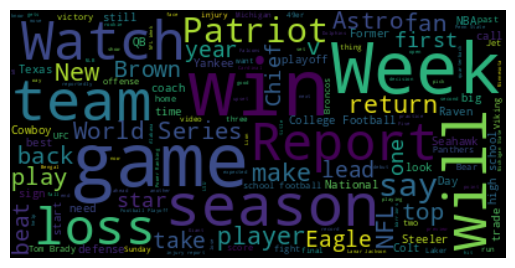

In [12]:
text=' '
for i in train_news[train_news['Category']=='sports']['Title']:
    text+=i+' '

# Make the figure
wordcloud = WordCloud().generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

## **WORDCLOUD FOR NEWS**

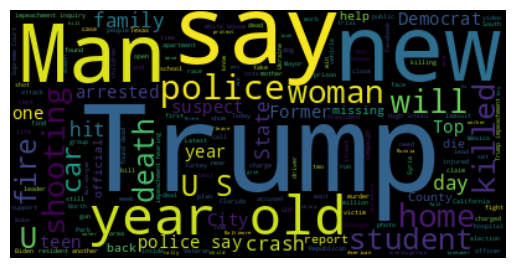

In [13]:
text=' '
for i in train_news[train_news['Category']=='news']['Title']:
    text+=i+' '

# Make the figure
wordcloud = WordCloud().generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

## **HISTOGRAM FOR TITLE LENGTH**

In [14]:
t=[]
for i in train_news['Title']:
    t.append(len(i))
px.histogram(t,color=train_news['Category'])

In [15]:
t = []
for i in train_news['Abstract']:
    t.append(len(str(i)))
px.histogram(t,color=train_news['Category'], nbins=100)

In [16]:
train_news

,News_ID,Category,SubCategory,Title,Abstract,URL,Title_Entities,Abstract_Entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."
...,...,...,...,...,...,...,...,...
51277,N16909,weather,weathertopstories,"Adapting, Learning And Soul Searching: Reflect...",Woolsey Fire Anniversary: A community is forev...,https://assets.msn.com/labs/mind/BBWzQJK.html,"[{""Label"": ""Woolsey Fire"", ""Type"": ""N"", ""Wikid...","[{""Label"": ""Woolsey Fire"", ""Type"": ""N"", ""Wikid..."
51278,N47585,lifestyle,lifestylefamily,Family says 13-year-old Broadway star died fro...,NaN,https://assets.msn.com/labs/mind/BBWzQYV.html,"[{""Label"": ""Broadway theatre"", ""Type"": ""F"", ""W...",[]
51279,N7482,sports,more_sports,St. Dominic soccer player tries to kick cancer...,"Sometimes, what happens on the sidelines can b...",https://assets.msn.com/labs/mind/BBWzQnK.html,[],[]
51280,N34418,sports,soccer_epl,How the Sounders won MLS Cup,"Mark, Jeremiah and Casey were so excited they ...",https://assets.msn.com/labs/mind/BBWzQuK.html,"[{""Label"": ""MLS Cup"", ""Type"": ""U"", ""WikidataId...",[]


----------

In [17]:
# Find duplicate news articles based on the 'Title' column
duplicate_news = train_news[train_news.duplicated(['Title'], keep=False)]

# Display the resulting DataFrame
duplicate_news

,News_ID,Category,SubCategory,Title,Abstract,URL,Title_Entities,Abstract_Entities
86,N61864,news,newsopinion,The News In Cartoons,News as seen through the eyes of the nation's ...,https://assets.msn.com/labs/mind/AABGTFJ.html,[],[]
195,N59709,sports,football_nfl,Adrian Peterson had to 'hold back tears' in re...,Adrian Peterson returned to Minnesota on Thurs...,https://assets.msn.com/labs/mind/AAJl4BK.html,"[{""Label"": ""Adrian Peterson"", ""Type"": ""P"", ""Wi...","[{""Label"": ""Adrian Peterson"", ""Type"": ""P"", ""Wi..."
202,N13882,sports,football_nfl,Adrian Peterson had to 'hold back tears' in re...,Adrian Peterson returned to Minnesota on Thurs...,https://assets.msn.com/labs/mind/AAJl4BQ.html,"[{""Label"": ""Adrian Peterson"", ""Type"": ""P"", ""Wi...","[{""Label"": ""Adrian Peterson"", ""Type"": ""P"", ""Wi..."
225,N6632,entertainment,celebrity,Star Tracks: Celebs on Vacation,Celebrity Vacations: Where Stars Travel,https://assets.msn.com/labs/mind/AADzDnw.html,[],[]
239,N14042,autos,autosnews,Latest Automotive Safety Recalls,The latest safety recalls issued by the Nation...,https://assets.msn.com/labs/mind/AAFfB8g.html,[],"[{""Label"": ""National Highway Traffic Safety Ad..."
...,...,...,...,...,...,...,...,...
51176,N17715,lifestyle,lifestylefamily,100-year-old veteran's family learns of Norman...,NaN,https://assets.msn.com/labs/mind/BBWyyCB.html,[],[]
51197,N61775,travel,travelarticle,"VA, DC Good News: Nats Fans Engaged, Safest Ci...","Good news on DC, NoVA Patches includes fans ge...",https://assets.msn.com/labs/mind/BBWyymS.html,"[{""Label"": ""Veterans Day"", ""Type"": ""H"", ""Wikid...","[{""Label"": ""Veterans Day"", ""Type"": ""H"", ""Wikid..."
51219,N57641,finance,finance-real-estate,Sunday Real Estate: 3 Luxurious Florida Homes,"Sunday Real Estate takes you to Star Island, L...",https://assets.msn.com/labs/mind/BBWyzQK.html,"[{""Label"": ""Real estate"", ""Type"": ""U"", ""Wikida...","[{""Label"": ""Lakewood Ranch, Florida"", ""Type"": ..."
51268,N5497,news,newsus,"Still teaching at 95, Jimmy Carter draws devot...","PLAINS, Ga. (AP) The pilgrims arrive early a...",https://assets.msn.com/labs/mind/BBWzBrF.html,"[{""Label"": ""Jimmy Carter"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Jimmy Carter"", ""Type"": ""P"", ""Wikid..."


In [18]:
train_news["Title_Entities"].iloc[1]

'[{"Label": "Adipose tissue", "Type": "C", "WikidataId": "Q193583", "Confidence": 1.0, "OccurrenceOffsets": [20], "SurfaceForms": ["Belly Fat"]}]'